In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises, t

In [16]:
def run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 5000, self_ref = True, meta_mutation_rate = 0.1, nlevels = 5, topk = 8, type = "instant"):
    """
        Initialize the parameters.

        Parameters:
        -----------
        n_exp : int, default=50
            The number of independent experiments performed.
        
        pop_size : int, default=100
            The number of individuals in the population

        init : float, default=0.1
            The initialization of meta-parameters.

        n_gen : int, default=5000
            Total number of generations.

        self_ref : bool, default=True
            Whether self-referential mutation rates are used (True) or not (False)

        meta_mutation_rate : float, default=0.1
            The (external) meta mutation rate. It is used only if self-referential mutations rates are not used (referential = False).

        nlevels : int, default=5
            Total number of levels, INCLUDING the solution level.

        topk : int, default=8
            The top-k parameter determining the number of top solutions that have children.

        type : str, default="instant"
            Determining how the mutations propagate - instantly ("instant") or in a delayed manner ("delayed)

        Returns:
        allbestfitnesses : np.array
            A np.array containing all of the best-of-generation fitnesses
        allbesties: np.array
            A np.array containing the best solution from every generation
        allsigmas: np.array
        A np.array containing the total history of solutions and mutation rates
        """

    allbestfitnesses = []
    allbesties = []
    allsigmas = []
    for j in range(n_exp):
        sigmas_history = []
        sigmas = init*np.ones((nlevels,pop_size))
        sigmas[-1,:] = 1000 ################### POOR INITIALIZATION
        bestfitnesses = []
        besties = []
        sigmas_history.append(sigmas.copy())
        for i in range(n_gen-1):
            #fitnesses = np.abs(sigmas[-1,:]-np.ones(pop_size)*np.exp(-5*abs(i % 200 - 100) / 100))
            solutions = sigmas[-1,:]
            #fitnesses = np.abs(solutions-np.ones(pop_size)*np.exp(-5*abs(i % 200 - 100) / 100))
            fitnesses = np.abs(solutions-np.zeros(pop_size)) ################ FITNESS FUNCTION 1
            #if (i // 100) % 2 == 0:  ################ FITNESS FUNCTION 2 (UNCOMMENT THIS LINE AND THE FOLLOWING 9 LINES)
             #   if i % 2 == 0:
              #      fitnesses = np.abs(solutions-np.zeros(pop_size))
              #  else:
              #      fitnesses = np.abs(solutions-np.ones(pop_size))
            #else:
             #   if i % 2 == 0:
              #      fitnesses = np.abs(solutions-np.zeros(pop_size))
              #  else:
               #     fitnesses = np.abs(solutions-10*np.ones(pop_size)) 
            sort_indices = np.argsort(fitnesses)
            bestindex = sort_indices[0]
            bestfitnesses.append(fitnesses[bestindex])
            besties.append(sigmas[:,bestindex].copy())
            top_indices = sort_indices[:topk]
            other_indices = np.array([i for i in range(pop_size) if i not in top_indices])
            sampled_indices = np.random.choice(top_indices, size=len(other_indices), replace=True)
            sigmas[:,other_indices] = sigmas[:,sampled_indices]
            if type == "instant":
                if self_ref == True:
                    sigmas[0,:] += np.random.normal(0,abs(sigmas[0,:]))
                else:
                    print(np.random.normal(0,meta_mutation_rate, ))
                    sigmas[0,:] += np.random.normal(0,meta_mutation_rate, size=len(sigmas[0,:]))
                for k in range(1,nlevels,1): 
                    sigmas[k,:] += np.random.normal(0,abs(sigmas[k-1,:]))
            else:
                for k in range(nlevels-1,0,-1): 
                    sigmas[k,:] += np.random.normal(0,abs(sigmas[k-1,:]))
                if self_ref == True:
                    sigmas[0,:] += np.random.normal(0,abs(sigmas[0,:]))
                else:
                    sigmas[0,:] += np.random.normal(0,meta_mutation_rate, size=len(sigmas[0,:]))
            sigmas[:-1,:] = abs(sigmas[:-1,:])
            sigmas_history.append(sigmas.copy())
        allbestfitnesses.append(bestfitnesses)
        allbesties.append(besties)
        allsigmas.append(sigmas_history)
    return -np.array(allbestfitnesses), np.array(allbesties), np.array(allsigmas)

In [17]:
run_simulations(n_exp = 2, pop_size=10, init = 0.1, n_gen = 100, self_ref = False, meta_mutation_rate = 100, nlevels = 2, topk = 8, type = "finstant")

-51.58621582813684
91.98343858897057
30.650052140158845
-62.8275937510122
35.618815189498804
111.57975643727347
16.246790468311804
15.564290458899988
-56.83532457018325
-42.72866202210792
152.13149137812653
-142.9662213275924
173.4163390945466
-27.183981939272307
-39.35491245900939
-168.1991246142744
-39.848182749090725
118.19053033860247
-90.39551223305739
-38.609704427164644
20.18073288987524
22.337696212318203
73.8345731384831
140.117532349305
15.002407974663473
-7.846467652519855
123.4985856988555
-180.47455793324977
-51.04484243831217
90.98070797381006
194.17829499065675
98.78282030658839
1.2324812142638109
101.7960729849271
-18.99145760692975
-40.669098763578496
-6.9738377399076805
66.31151911760006
56.4317723041944
-32.50516504796014
15.68249489630312
-125.72114394557428
64.45382381210146
75.46420961002451
-138.30647670886722
-43.49498131162359
350.9530020501231
-74.50425096287258
-59.63599858675899
102.99533391921602
-42.583545333914266
-153.37355385689173
113.46593123226015
-2

(array([[-1.00000000e+03, -9.99707880e+02, -9.82048183e+02,
         -9.98989492e+02, -1.01085322e+03, -9.79048202e+02,
         -8.80508176e+02, -8.78711666e+02, -8.41173232e+02,
         -8.23934464e+02, -7.45741452e+02, -6.67212229e+02,
         -3.52702315e+02, -3.68995612e+01, -1.12271077e+02,
         -6.14582367e+01, -4.30595993e+01, -7.20101238e+00,
         -1.20524496e+01, -1.08323413e+01, -2.14398227e+01,
         -4.98140309e+00, -5.53031699e+00, -6.42058272e+01,
         -1.09175476e+01, -3.30344980e+00, -7.70836914e+00,
         -8.64993002e+00, -3.57533820e+00, -5.04708118e+00,
         -3.02721935e+01, -1.16910313e+01, -7.24382557e+00,
         -3.09555310e+01, -1.18502356e+00, -1.74838514e+01,
         -2.06061767e+01, -2.01522726e+00, -3.14370408e+01,
         -6.58446934e+00, -8.71717422e+01, -6.48989236e+01,
         -6.24732128e+01, -2.60544252e+01, -2.45501070e+01,
         -3.21391784e+01, -1.08021023e+01, -9.33448927e+00,
         -1.80399046e+00, -4.37787415e+0

In [115]:
allbestfitnesses1, allbesties1, allsigmas1 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 100, nlevels = 2, topk = 8, type = "instant")
print("eto")
allbestfitnesses2, allbesties2, allsigmas2 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 100, nlevels = 3, topk = 8, type = "instant")
allbestfitnesses3, allbesties3, allsigmas3 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 200, nlevels = 4, topk = 8, type = "instant")
allbestfitnesses4, allbesties4, allsigmas4 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 10, nlevels = 5, topk = 8, type = "instant")
allbestfitnesses5, allbesties5, allsigmas5 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 10, nlevels = 6, topk = 8, type = "instant")
allbestfitnesses6, allbesties6, allsigmas6 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 10, nlevels = 7, topk = 8, type = "instant")
allbestfitnesses7, allbesties7, allsigmas7 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 10, nlevels = 8, topk = 8, type = "instant")
allbestfitnesses8, allbesties8, allsigmas8 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 50, nlevels = 2, topk = 8, type = "ninstant")
allbestfitnesses9, allbesties9, allsigmas9 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 100, nlevels = 3, topk = 8, type = "ninstant")
allbestfitnesses10, allbesties10, allsigmas10 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 0.50, nlevels = 4, topk = 8, type = "ninstant")
allbestfitnesses11, allbesties11, allsigmas11 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1, nlevels = 5, topk = 8, type = "ninstant")
allbestfitnesses12, allbesties12, allsigmas12 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1, nlevels = 6, topk = 8, type = "ninstant")
allbestfitnesses13, allbesties13, allsigmas13 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1, nlevels = 7, topk = 8, type = "ninstant")
allbestfitnesses14, allbesties14, allsigmas14 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 2, nlevels = 8, topk = 8, type = "ninstant")
#allbestfitnesses11, allbesties11, allsigmas11 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 5, nlevels = 5, topk = 8, type = "ninstant")
#llbestfitnesses12, allbesties12, allsigmas12 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 10, nlevels = 5, topk = 8, type = "ninstant")
#allbestfitnesses13, allbesties13, allsigmas13 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 50, nlevels = 5, topk = 8, type = "ninstant")
#allbestfitnesses14, allbesties14, allsigmas14 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 100, nlevels = 5, topk = 8, type = "ninstant")
#allbestfitnesses8, allbesties8, allsigmas8 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 0.5, nlevels = 4, topk = 8, type = "ninstant")
#allbestfitnesses9, allbesties9, allsigmas9 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1.0, nlevels = 5, topk = 8, type = "ninstant")
#allbestfitnesses10, allbesties10, allsigmas10 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 2.0, nlevels = 6, topk = 8, type = "ninstant")
#allbestfitnesses11, allbesties11, allsigmas11 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 1000, self_ref = False, meta_mutation_rate = 0.01, nlevels = 4, topk = 8, type = "instant")
#allbestfitnesses12, allbesties12, allsigmas12 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 1000, self_ref = False, meta_mutation_rate = 0.002, nlevels = 5, topk = 8, type = "instant")

eto


In [194]:
allbestfitnesses15, allbesties15, allsigmas15 = run_simulations(n_exp = 20, pop_size=100, init = 0.1, n_gen = 3000, self_ref = True, meta_mutation_rate = 1, nlevels = 9, topk = 8, type = "instant")
#allbestfitnesses16, allbesties16, allsigmas16 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1, nlevels = 9, topk = 8, type = "ninstant")
#allbestfitnesses17, allbesties17, allsigmas17 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 1, nlevels = 10, topk = 8, type = "instant")
#allbestfitnesses18, allbesties18, allsigmas18 = run_simulations(n_exp = 500, pop_size=100, init = 0.1, n_gen = 300, self_ref = True, meta_mutation_rate = 2, nlevels = 10, topk = 8, type = "ninstant")

In [108]:
allbestfitnesses11, allbesties11, allsigmas11 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 200, nlevels = 7, topk = 8, type = "instant")
allbestfitnesses12, allbesties12, allsigmas12 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 500, nlevels = 7, topk = 8, type = "ninstant")
#allbestfitnesses17, allbesties17, allsigmas17 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 200, nlevels = 5, topk = 8, type = "ninstant")
#allbestfitnesses18, allbesties18, allsigmas18 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 300, self_ref = False, meta_mutation_rate = 500, nlevels = 5, topk = 8, type = "ninstant")

In [167]:
#allbestfitnesses17, allbesties17, allsigmas17 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = False, meta_mutation_rate = 100.0, nlevels = 5, topk = 8, type = "instant")
#allbestfitnesses18, allbesties18, allsigmas18 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = False, meta_mutation_rate = 200.0, nlevels = 5, topk = 8, type = "instant")

In [142]:
print(np.percentile(allbestfitnesses1,[50,25,75]))
print(np.percentile(allbestfitnesses2,[50,25,75]))
print(np.percentile(allbestfitnesses3,[50,25,75]))
print(np.percentile(allbestfitnesses4,[50,25,75]))
print(np.percentile(allbestfitnesses5,[50,25,75]))
print(np.percentile(allbestfitnesses6,[50,25,75]))
print(np.percentile(allbestfitnesses7,[50,25,75]))
print(np.percentile(allbestfitnesses8,[50,25,75]))
print(np.percentile(allbestfitnesses9,[50,25,75]))
print(np.percentile(allbestfitnesses10,[50,25,75]))

[-0.08493551 -0.43063694 -0.01788188]
[-0.19901834 -0.88192488 -0.04705592]
[-0.32692954 -1.35248993 -0.08251154]
[ -4.68158739 -12.88004406  -1.41751131]
[-0.00097214 -0.00283148 -0.00028258]
[ -4.88548044 -23.51464768  -1.09942939]
[-11.31778673 -52.97579079  -2.49440992]
[ -2.50316235 -11.6380953   -0.49637929]
[ -86.9779814  -399.42888908  -17.58066939]
[-140.6589659  -680.25675509  -26.48223701]


In [158]:
print(np.mean(np.mean(allbestfitnesses1,axis=1)))
print(np.std(np.mean(allbestfitnesses1,axis=1)))
print(np.mean(np.mean(allbestfitnesses2,axis=1)))
print(np.std(np.mean(allbestfitnesses2,axis=1)))
print(np.mean(np.mean(allbestfitnesses3,axis=1)))
print(np.std(np.mean(allbestfitnesses3,axis=1)))
print(np.mean(np.mean(allbestfitnesses4,axis=1)))
print(np.std(np.mean(allbestfitnesses4,axis=1)))
print(np.mean(np.mean(allbestfitnesses5,axis=1)))
print(np.std(np.mean(allbestfitnesses5,axis=1)))
print(np.mean(np.mean(allbestfitnesses6,axis=1)))
print(np.std(np.mean(allbestfitnesses6,axis=1)))
print(np.mean(np.mean(allbestfitnesses7,axis=1)))
print(np.std(np.mean(allbestfitnesses7,axis=1)))
print(np.mean(np.mean(allbestfitnesses8,axis=1)))
print(np.std(np.mean(allbestfitnesses8,axis=1)))
print(np.mean(np.mean(allbestfitnesses9,axis=1)))
print(np.std(np.mean(allbestfitnesses9,axis=1)))
print(np.mean(np.mean(allbestfitnesses10,axis=1)))
print(np.std(np.mean(allbestfitnesses10,axis=1)))
print(np.mean(np.mean(allbestfitnesses11,axis=1)))
print(np.std(np.mean(allbestfitnesses11,axis=1)))
print(np.mean(np.mean(allbestfitnesses12,axis=1)))
print(np.std(np.mean(allbestfitnesses12,axis=1)))
print(np.mean(np.mean(allbestfitnesses13,axis=1)))
print(np.std(np.mean(allbestfitnesses13,axis=1)))
print(np.mean(np.mean(allbestfitnesses14,axis=1)))
print(np.std(np.mean(allbestfitnesses14,axis=1)))
print("pauz")
print(np.mean(np.mean(allbestfitnesses15,axis=1)))
print(np.std(np.mean(allbestfitnesses15,axis=1)))
print(np.mean(np.mean(allbestfitnesses16,axis=1)))
print(np.std(np.mean(allbestfitnesses16,axis=1)))
print(np.mean(np.mean(allbestfitnesses17,axis=1)))
print(np.std(np.mean(allbestfitnesses17,axis=1)))
print(np.mean(np.mean(allbestfitnesses18,axis=1)))
print(np.std(np.mean(allbestfitnesses18,axis=1)))


-30.63317685633115
2.3164285768835104
-39.92153553825375
36.73321790508688
-50.73084470847405
26.649935092557758
-47.19317174305883
17.517368399804326
-42.01184578627435
12.496080149125362
-36.34543686509259
8.653842728353938
-33.71478507608431
7.69039514219571
-40.54279818859539
5.253377085635006
-317.20834770831084
309.4512129161902
-166.43979680363648
117.8915875035129
-114.55131105904357
61.370174460420316
-118.66537429525157
599.2541765267964
-511.071138073124
6982.360937460417
-817.405670464281
9666.849720231698
pauz
-31.935720824553435
7.27831447971168
-1157.6068685578243
8873.23325697432
-30.34334142212454
7.588165374947086
-174329.17073779483
3439154.063189049


In [150]:
print(np.mean(allbestfitnesses15))
print(np.std(allbestfitnesses15))
print(np.mean(allbestfitnesses16))
print(np.std(allbestfitnesses16))
print(np.mean(allbestfitnesses17))
print(np.std(allbestfitnesses17))
print(np.mean(allbestfitnesses18))
print(np.std(allbestfitnesses18))
#print(np.mean(allbestfitnesses7))
#print(np.mean(allbestfitnesses8))
#print(np.mean(allbestfitnesses9))
#print(np.mean(allbestfitnesses10))
#print(np.mean(allbestfitnesses11))
#print(np.mean(allbestfitnesses12))
#print(np.mean(allbestfitnesses13))
#print(np.mean(allbestfitnesses14))
#print(np.mean(allbestfitnesses15))
#print(np.mean(allbestfitnesses16))
#print(np.mean(allbestfitnesses17))
#print(np.mean(allbestfitnesses18))

-31.935720824553428
164.6181121812576
-1157.6068685578243
28392.419461834765
-30.343341422124546
160.44140949437534
-174329.17073779478
10351747.892149126


In [18]:
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses1)))
#print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses2)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses3)))  
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses4)))
#print("The mean best-of-generation fitness is: {}".format(np.mean(allbestfitnesses5)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses6)))

The median best-of-generation fitness is: -5.768232410426615
The median best-of-generation fitness is: -0.9724322110333246
The median best-of-generation fitness is: -1.77699445534585


NameError: name 'allbestfitnesses6' is not defined

In [59]:
allbestfitnesses7, allbesties7, allsigmas7 = run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 1000, self_ref = False, meta_mutation_rate = 10, nlevels = 2, topk = 8, type = "instant")

In [60]:
print(np.median(allbestfitnesses7))

-1.0534036217505336


In [17]:
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses1)))
#print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses2)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses3)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses4)))
#print("The mean best-of-generation fitness is: {}".format(np.mean(allbestfitnesses5)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses6))) # sad ovo

The median best-of-generation fitness is: -5.768232410426615
The median best-of-generation fitness is: -0.9724322110333246
The median best-of-generation fitness is: -1.77699445534585


NameError: name 'allbestfitnesses6' is not defined

In [43]:
def plotter(type="mean",what="best",level=0,maxtime=1000):
    if type == "mean" and what == "best":
        plt.plot(np.mean(allbesties1[:,:,-1-level], axis=0)[:maxtime])
    elif type == "median" and what == "best":
        plt.plot(np.median(allbesties1[:,:,-1-level], axis=0)[:maxtime])
    elif type == "mean" and what == "all":
        plt.plot(np.mean(allsigmas1[:,:,-1-level,:],axis=(0,2))[:maxtime])
    else:
        plt.plot(np.median(allsigmas1[:,:,-1-level,:],axis=(0,2))[:maxtime])

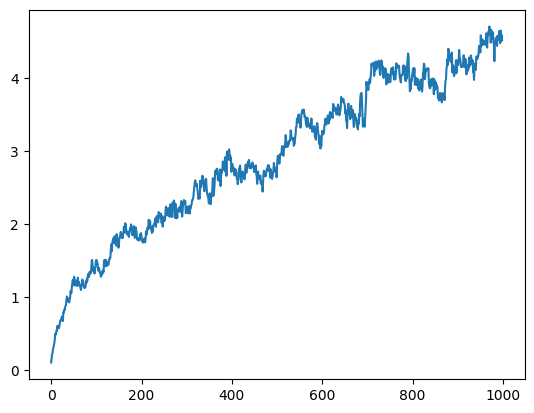

In [44]:
plotter("median","best",1,maxtime=2000)

In [28]:
#np.median(allbesties1[:,:,-1], axis=0)[15]
print(allsigmas4[0,201,:,10])
print(allsigmas4[0,202,:,10])

[ 218.50143061  157.93215145  351.25975611  334.29008769 -755.6865476 ]
[  222.47392915   392.46389204  1001.7162907   1407.55656095
 -1839.24892342]


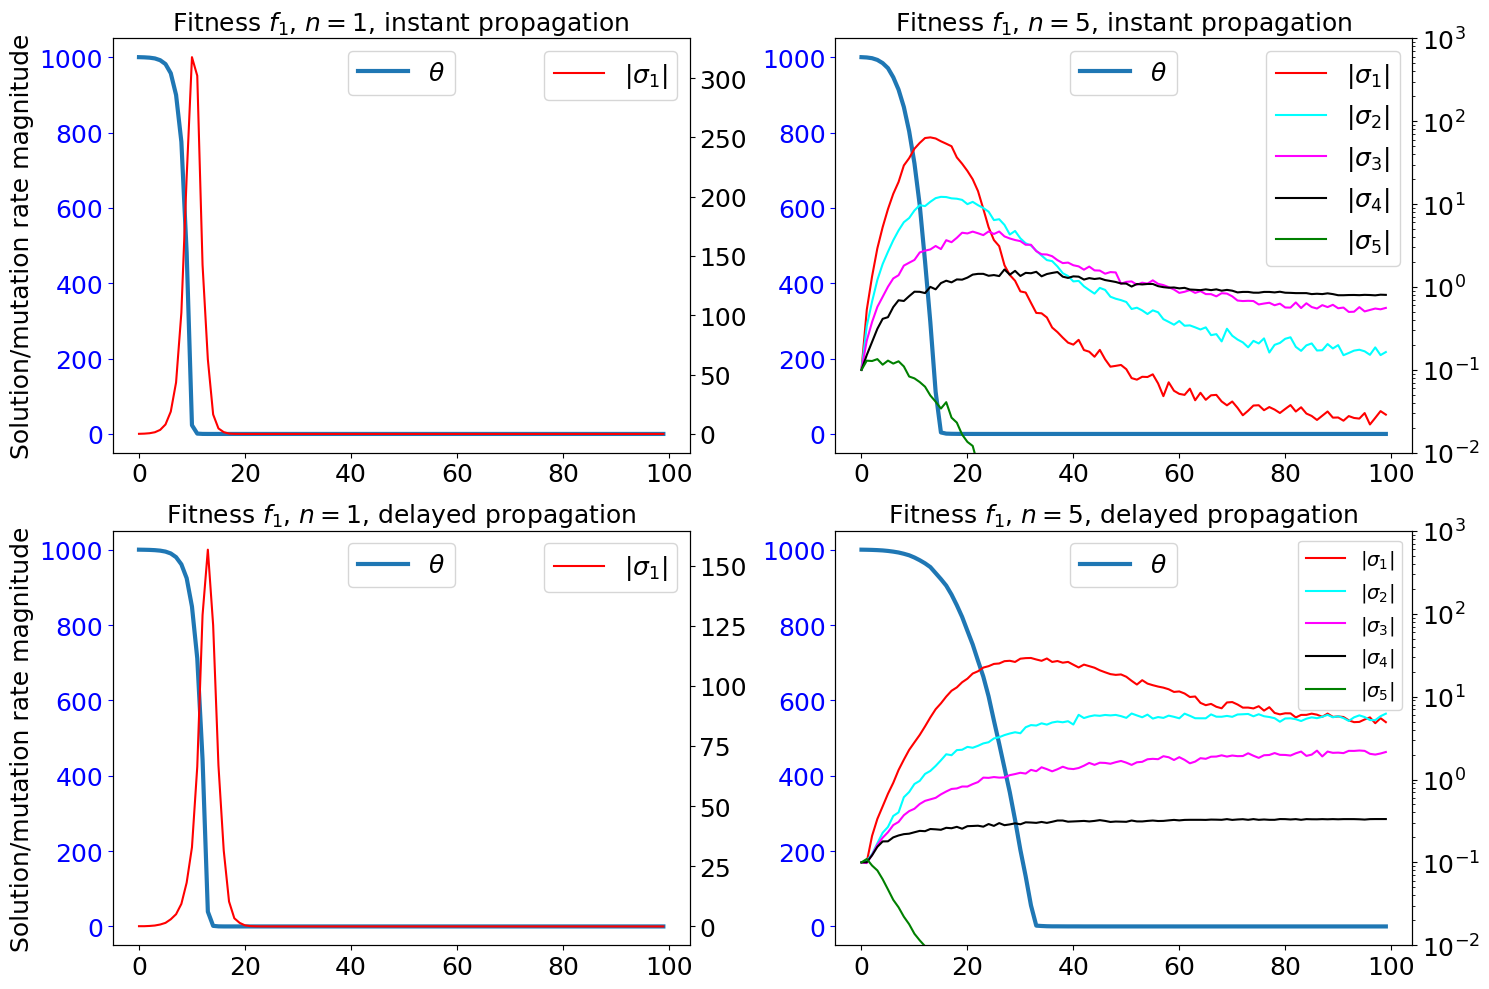

In [172]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
(ax1, ax3), (ax4, ax6) = axes

# First plot (top subplot)
#ax1.set_yscale('log')
ax1.plot(np.median(allbesties1[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=3)
#ax1.plot(np.median(allbesties1[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', alpha = 1.0)
ax96 = ax1.twinx()
#ax96.set_yscale('log')
ax96.plot(np.mean(allbesties1[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color = "red", alpha = 1.0)
#ax1.plot(metabesties3_medians[:1000], label=r'$\sigma_2$', alpha = 0.5)
#ax1.plot(metabesties4_medians[:1000], label=r'$\sigma_1$', alpha=0.7)
#ax1.plot(metabesties5_medians[:1000], label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigmas6_medians, label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigma6s_v1_medians**2, label=r'$\theta^2$', alpha=1.0)
#ax1.set_xlabel("Generation", fontsize=12)
ax1.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax1.set_title("Fitness $f_1$, $n=1$, instant propagation", fontsize=18)
#ax96.set_ylim([1e-5, 1e+2])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax96.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax96.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper center', fontsize=18)
ax96.legend(lines2, labels2, loc='upper right', fontsize=18)
#ax1.legend(loc=4, fontsize=18)
'''
#ax2.set_yscale('log')
ax2.plot(np.median(allbesties2[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax97 = ax2.twinx()
#ax97.set_yscale('log')
ax97.plot(np.median(allbesties2[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax97.plot(np.median(allbesties2[:,:,-3], axis=0)[:100], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax97.plot(np.median(allbesties2[:,:,-4], axis=0)[:100], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
#ax2.plot(metabesties5_medians_alt[:1000], label=r'$\theta$', alpha=0.1)
#ax2.plot(metasigmas6_medians_alt, label=r'$\theta$', alpha=0.2, color = "blue")
#ax2.axhline(y=0.04, color='r', linestyle='--', linewidth=1, label=r'0.04')
#ax2.set_xlabel("Generation", fontsize=12)
ax2.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax2.set_title("Fitness $f_2$, $n=3$, instant propagation", fontsize=18)
#ax2.set_ylim([1e-2, 2e1])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax97.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax97.get_legend_handles_labels()
ax97.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax97.legend(loc=4, fontsize=18)
'''

#ax3.set_yscale('log')
ax3.plot(np.median(allbesties5[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=3)
ax98 = ax3.twinx()
ax98.set_yscale('log')
ax98.plot(np.median(allbesties5[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax98.plot(np.median(allbesties5[:,:,-3], axis=0)[:100], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax98.plot(np.median(allbesties5[:,:,-4], axis=0)[:100], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax98.plot(np.median(allbesties5[:,:,-5], axis=0)[:100], label=r'|$\sigma_4$|', color="black", alpha=1.0)
ax98.plot(np.median(allbesties5[:,:,-6], axis=0)[:100], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
#ax3.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax3.set_title("Fitness $f_1$, $n=5$, instant propagation", fontsize=18)
#ax3.set_ylim([1e-3, 2e0])
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax98.tick_params(axis='both', which='major', labelsize=18)
ax98.set_ylim([1e-2, 1e+3])
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax98.get_legend_handles_labels()
ax3.legend(lines1, labels1, loc='upper center', fontsize=18)
ax98.legend(lines2, labels2, loc='upper right', fontsize=18)

#allsigmas1[:,:,-1-level,:],axis=(0,2)

#ax4.set_yscale('log')
ax4.plot(np.median(allbesties8[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=3)
ax99 = ax4.twinx()
#ax99.set_yscale('log')
ax99.plot(np.median(allbesties8[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color = "red", alpha = 1.0)
#ax4.plot(metabesties3_medians2[:1000], label=r'$\sigma_2$', alpha = 0.5)
#ax4.plot(metabesties4_medians2[:1000], label=r'$\sigma_1$', alpha=0.7)
#ax4.plot(metabesties5_medians2[:1000], label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigmas6_medians, label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigma6s_v1_medians**2, label=r'$\theta^2$', alpha=1.0)
#ax1.set_xlabel("Generation", fontsize=12)
ax4.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax4.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax4.set_title("Fitness $f_1$, $n=1$, delayed propagation", fontsize=18)
#ax4.set_ylim([1e-7, 2e-1])
ax4.tick_params(axis='both', which='major', labelsize=18)
ax99.tick_params(axis='both', which='major', labelsize=18)
#ax99.set_ylim([1e-500, 1e+5])
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax99.get_legend_handles_labels()
ax4.legend(lines1, labels1, loc='upper center', fontsize=18)
ax99.legend(lines2, labels2, loc='upper right', fontsize=18)

'''
#ax5.set_yscale('log')
ax5.plot(np.median(allbesties5[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax500 = ax5.twinx()
ax500.plot(np.median(allbesties5[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax500.plot(np.median(allbesties5[:,:,-3], axis=0)[:100], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax500.plot(np.median(allbesties5[:,:,-4], axis=0)[:100], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
#ax5.plot(metabesties5_medians_alt2[:1000], label=r'$\theta$', alpha=0.1)
#ax3.plot(metasigma6s_v1_medians_alt_alt**2, label=r'$\theta^2$', alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
#ax5.set_ylabel("Mutation rate maginute |$\sigma^2$|", fontsize=12)
ax5.set_title("Fitness $f_1$, $n=1$, delayed propagation", fontsize=18)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax500.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax500.get_legend_handles_labels()
ax500.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax5.set_ylim([1e-8, 1e+3])
#ax5.legend(loc=4, fontsize=18)
'''

#ax6.set_yscale('log')
ax6.plot(np.median(allbesties12[:,:,-1], axis=0)[:100], label=r'$\theta$', alpha = 1.0, linewidth=3)
ax101 = ax6.twinx()
ax101.set_yscale('log')
ax101.plot(np.median(allbesties12[:,:,-2], axis=0)[:100], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax101.plot(np.median(allbesties12[:,:,-3], axis=0)[:100], label=r'|$\sigma_2$|', color="cyan",  alpha = 1.0)
ax101.plot(np.median(allbesties12[:,:,-4], axis=0)[:100], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax101.plot(np.median(allbesties12[:,:,-5], axis=0)[:100], label=r'|$\sigma_4$|', color="black", alpha=1.0)
ax101.set_ylim([1e-2, 1e+3])
ax101.plot(np.median(allbesties12[:,:,-6], axis=0)[:100], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
#ax6.set_ylabel("utation rate $\sigma^2$", fontsize=12)
ax6.set_title("Fitness $f_1$, $n=5$, delayed propagation", fontsize=18)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax6.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax101.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax6.get_legend_handles_labels()
lines2, labels2 = ax101.get_legend_handles_labels()
ax6.legend(lines1, labels1, loc='upper center', fontsize=18)
ax101.legend(lines2, labels2, loc='upper right', fontsize=14)

#ax4.set_yscale('log')
#ax4.plot(metasigma1s_v4_medians**2, label=r'$\sigma_2^2$')
#ax4.plot(metasigma2s_v4_medians**2, label=r'$\sigma_1^2$', linewidth = 2)
#ax4.plot(metasigma3s_v4_medians**2, label=r'$\theta^2$')
#ax4.plot(metasigma4s_v4_medians**2, label=r'$\sigma_2^2$', alpha=0.6)
#ax4.plot(metasigma5s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax4.plot(metasigma6s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax4.axhline(y=1.0, color='r', linestyle='--', linewidth=1, label=r'1.00')
#ax4.set_xlabel("Generation", fontsize=12)
#ax4.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=12)
#ax4.set_title("Initialization $\sigma = 1.0$", fontsize=14)
#ax4.legend(loc=2)

# Adjust layout to prevent overlap
plt.tight_layout()

# Uncomment the following line if you want to save the figure
#plt.savefig("main1.pdf")

# Show the plots
plt.show()

In [196]:
np.median(allbesties15[:,:,-1], axis=0)[-100:]

array([-1.74865884e-05, -1.18460388e-05, -2.42458158e-04,  9.66448692e-05,
       -3.27830017e-05,  9.01340695e-04, -2.52236107e-05,  6.94541996e-05,
       -8.14070386e-05,  2.27796363e-04,  6.24125605e-05,  8.55965935e-06,
        2.46868067e-06,  1.10785658e-05,  6.03119964e-05,  1.47155385e-04,
        1.23728410e-05, -5.97588649e-06,  6.61640367e-05,  1.33985124e-04,
        5.26597754e-04,  1.32982313e-04,  1.09935750e-04,  8.51921608e-05,
       -7.77297069e-06, -4.27745015e-04,  1.80724354e-04, -1.22865584e-04,
        1.67513977e-05, -1.98219366e-05, -1.40935334e-04, -1.75531182e-04,
        4.75606268e-05, -9.88415018e-05,  1.23347806e-04,  6.84305534e-04,
       -1.71442760e-04,  3.15466268e-04,  7.71644718e-05, -9.58455739e-05,
       -8.64910762e-06, -6.37930717e-05, -1.24824567e-04,  1.40803956e-06,
       -7.51158173e-05,  6.74681413e-05, -3.90579872e-04, -5.05163117e-04,
        2.59994478e-04,  9.48288914e-05,  3.08188528e-05, -8.11894069e-04,
        7.05001850e-05, -

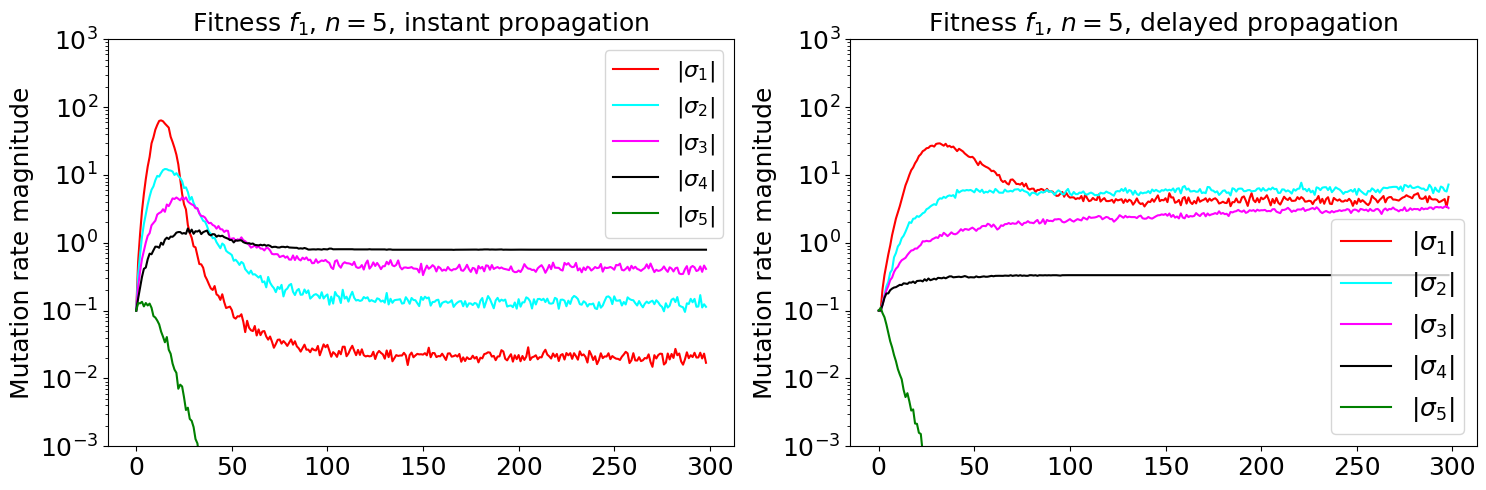

In [171]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(ax3, ax6) = axes

#ax3.set_yscale('log')
#ax3.plot(np.median(allbesties3[:,:,-1], axis=0)[:1000], label=r'$\theta$', alpha = 1.0, linewidth=3)
ax3.set_yscale('log')
ax3.plot(np.median(allbesties5[:,:,-2], axis=0)[:1000], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax3.plot(np.median(allbesties5[:,:,-3], axis=0)[:1000], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax3.plot(np.median(allbesties5[:,:,-4], axis=0)[:1000], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax3.plot(np.median(allbesties5[:,:,-5], axis=0)[:1000], label=r'|$\sigma_4$|', color="black", alpha=1.0)
ax3.plot(np.median(allbesties5[:,:,-6], axis=0)[:1000], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
ax3.set_ylabel("Mutation rate magnitude", fontsize=18)
ax3.set_title("Fitness $f_1$, $n=5$, instant propagation", fontsize=18)
#ax3.set_ylim([1e-3, 2e0])
#ax3.tick_params(axis='both', which='major', labelsize=18)
#ax3.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_ylim([1e-3, 1e+3])
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax98.get_legend_handles_labels()
ax3.legend(lines2, labels2, loc='upper right', fontsize=16)

#ax6.set_yscale('log')
#ax6.plot(np.median(allbesties4[:,:,-1], axis=0)[:1000], label=r'$\theta$', alpha = 1.0, linewidth=3)
ax6.set_yscale('log')
ax6.plot(np.median(allbesties12[:,:,-2], axis=0)[:1000], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax6.plot(np.median(allbesties12[:,:,-3], axis=0)[:1000], label=r'|$\sigma_2$|', color="cyan",  alpha = 1.0)
ax6.plot(np.median(allbesties12[:,:,-4], axis=0)[:1000], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax6.plot(np.median(allbesties12[:,:,-5], axis=0)[:1000], label=r'|$\sigma_4$|', color="black", alpha=1.0)
ax6.plot(np.median(allbesties12[:,:,-6], axis=0)[:1000], label=r'|$\sigma_5$|', color="green", alpha=1.0)
ax6.set_ylim([1e-3, 1e+3])
#ax101.plot(np.median(allbesties6[:,:,-6], axis=0)[:80], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
ax6.set_ylabel("Mutation rate magnitude", fontsize=18)
ax6.set_title("Fitness $f_1$, $n=5$, delayed propagation", fontsize=18)
#ax6.tick_params(axis='both', which='major', labelsize=18)
#ax6.tick_params(axis='y', which='major', labelsize=18, colors='blue')
ax6.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax6.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax6.legend(lines2, labels2, loc='best', fontsize=18)

# Adjust layout to prevent overlap
plt.tight_layout()

# Uncomment the following line if you want to save the figure
plt.savefig("main1_add.pdf")

# Show the plots
plt.show()

In [63]:
np.median(allbesties3[:,:,-1], axis=0)[700:1000]

array([-4.12806965e-06, -4.45974767e-06, -1.97643991e-06,  1.50985936e-06,
        1.59385226e-05,  4.71088023e-06, -1.21815910e-05,  1.40225904e-05,
        1.48973644e-07, -1.30718871e-05,  5.85513803e-06, -3.42911297e-06,
       -1.50776967e-05, -1.12565664e-05,  2.67122373e-06, -9.45100813e-06,
       -3.53801296e-06, -8.03959808e-06, -7.05944231e-06, -1.60785038e-06,
       -5.16863060e-06, -7.08572228e-06, -9.47201928e-07,  7.23144350e-06,
        1.01783185e-07,  6.27611334e-06,  3.19318132e-05, -8.94762583e-06,
       -1.86401220e-06, -5.75810789e-06,  4.21789339e-06, -2.43469398e-05,
        3.92574878e-06, -2.93169906e-06, -3.79850933e-06, -1.41887248e-06,
        3.40642067e-06, -9.56618024e-06, -2.17514918e-06, -7.83170157e-06,
       -1.08270527e-05,  1.31347125e-05,  2.02110829e-06,  4.60675966e-06,
        6.73270754e-07, -8.50549245e-06,  7.34052930e-08,  9.40330738e-09,
       -7.91979004e-06, -4.98669303e-06,  9.12348311e-07, -6.43572538e-06,
        1.72444590e-06, -